In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import plotly.graph_objects as go

Punto 1

In [ ]:
#Iteraciones
N = 100
# Generación de caracterisiticas
x_1 = 2 * np.random.random(N) - 1
x_2 = 2 * np.random.random(N) - 1

# Ecuación del plano
y_label = 2.1 * x_1 - 3.1 * x_2
#Creación de dataframe
df = pd.DataFrame({"x1":x_1, "x2":x_2, "y":y_label})
#Columna de unos
df["ones"]=1

In [ ]:
#Creación de gráfica 3d

fig = go.Figure(data=[go.Scatter3d(
    x=df['x1'],
    y=df['x2'],
    z=df['y'],
    mode='markers',
    marker=dict(
        size=4,
        color=df['y'],                # conjunto de colores
        colorscale='Viridis',   # elección de color
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Punto 2

In [ ]:
#Generación de thetas aleatorios
theta=np.random.random(3).reshape(3, 1)

Punto 3

In [ ]:
# Creación de matrix X de dimensión (n+1, m) incluyendo fila de unos
X = df[["ones", "x1", "x2"]].values.T
# Matrix df valores de y
Y = df.y.values.reshape(1, N)

Punto 4

In [ ]:
# Función modelo
def model(theta, X):
  return theta.T@X
# Función de coste
def costo(h, Y):
  J= (h-Y)**2
  return J.mean()
# Función de calculo de gradiente descendente
def update_params(theta, h, Y, learning_rate):
  """
  Gradiente descendente
  """
  grad = np.dot((h-Y), X.T).T
  theta = theta - learning_rate*grad
  return theta

Punto 5

In [ ]:
# Aplicación de gradiente descendente
#Valor de constante a
learning_rate=0.01
# Iteraciones
Niter=100
# Lista para almacenar los valores del gradiente
J = np.zeros(Niter)

# Calculo de los valores del gradiente
for i in range(0, Niter):
  h = model(theta, X)
  J[i] = costo(h, Y)
  theta = update_params(theta, h, Y, learning_rate)

los valores de theta que se ajustan al plano son: [[ 6.29278636e-17]
 [ 2.10000000e+00]
 [-3.10000000e+00]]


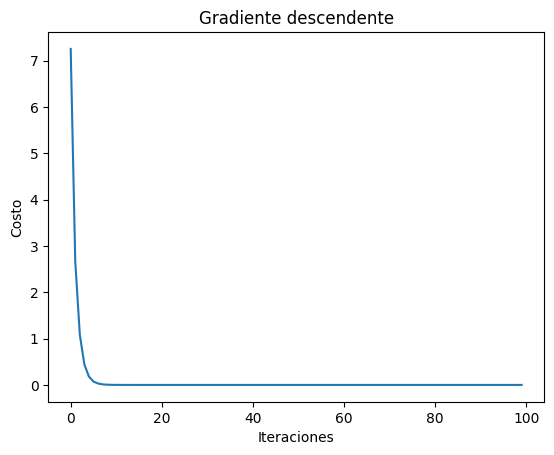

In [ ]:
#Valores de theta que se ajustan al plano
print(f'los valores de theta que se ajustan al plano son: {theta}')
plt.plot(J)
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.title("Gradiente descendente")
plt.show()


In [ ]:
#Plano de función modelo con valores de las caracteristicas

# Definición de los valores de theta
theta_0 = theta[0][0]
theta_1 = theta[1][0]
theta_2 = theta[2][0]

# Definición de los valores de las  x caracterisiticas
x_1=np.linspace(df['x1'].min(), df['x1'].max(), 10)
x_2=np.linspace(df['x2'].min(), df['x2'].max(), 10)
X1, X2 = np.meshgrid(x_1, x_2)
# Ecuacion modelo
Y_p = theta_0 + theta_1 * X1 + theta_2 * X2

#Gráfica
fig = go.Figure(data=[
    go.Surface(x=X1, y=X2, z=Y_p, opacity=0.7, showscale=False),
    go.Scatter3d(
        x=df['x1'],
        y=df['x2'],
        z=df['y'],
        mode='markers',
        marker=dict(
            size=4,
            color=df['y'],  # set color to an array/list of desired values
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        )
    )
])


fig.show()